In [ ]:
#Variáveis que eu vou usar - KD, pontuação e WL (VITÓRIAS E DERROTAS), MVP e Dano causado 

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

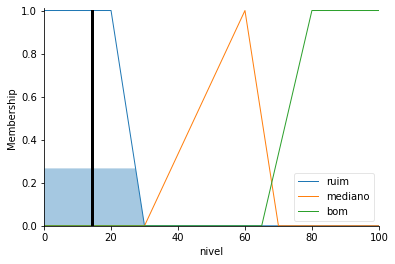

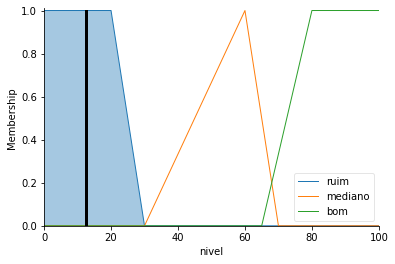

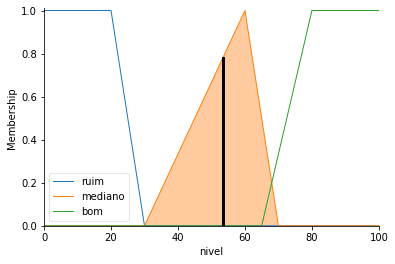

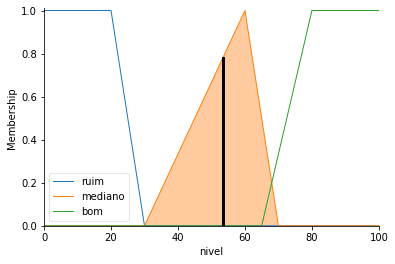

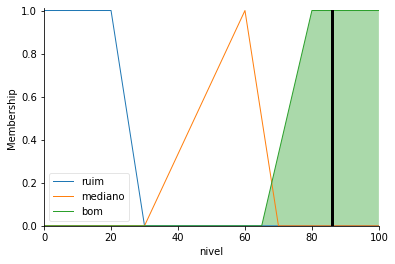

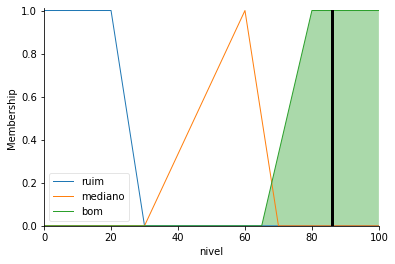

In [38]:
#@title
if __name__=="__main__":

  #variáveis de entrada:
  kd = ctrl.Antecedent(np.arange(0, 51, 1), 'kd')
  mvp = ctrl.Antecedent(np.arange(0, 101, 1), 'mvp')
  wl = ctrl.Antecedent(np.arange(0, 51, 1), 'wl')
  pontuacao = ctrl.Antecedent(np.arange(0, 101, 1), 'pontuacao')

  #inserido no dia 06/10/2022 VERIFICAR COM O GRUPO
  assist = ctrl.Antecedent(np.arange(0, 51, 1), 'assist')
  danoCausado = ctrl.Antecedent(np.arange(0,51,1), 'dano')

  #variável de saída:
  nivelJogador = ctrl.Consequent(np.arange(0, 101, 1), 'nivel')

  #fuzzificação:
  kd['baixo'] = fuzz.trapmf(kd.universe, [0, 0, 10, 25])
  kd['medio'] = fuzz.trapmf(kd.universe, [20, 25, 35, 40])
  kd['alto'] = fuzz.trapmf(kd.universe, [35, 40, 50, 50])

  assist['baixo'] = fuzz.trapmf(assist.universe, [0, 0, 10, 25])
  assist['medio'] = fuzz.trapmf(assist.universe, [20, 25, 35, 40])
  assist['alto'] = fuzz.trapmf(assist.universe, [35, 40, 50, 50])

  danoCausado['baixo'] = fuzz.trapmf(danoCausado.universe, [0, 0, 10, 25])
  danoCausado['medio'] = fuzz.trapmf(danoCausado.universe, [20, 25, 35, 40])
  danoCausado['alto'] = fuzz.trapmf(danoCausado.universe, [35, 40, 50, 50])

  mvp['baixo'] = fuzz.trapmf(mvp.universe, [0, 0, 30, 40])
  mvp['medio'] = fuzz.trapmf(mvp.universe, [35, 40, 70, 80])
  mvp['alto'] = fuzz.trapmf(mvp.universe, [75, 80, 100, 100])

  wl['baixo'] = fuzz.trapmf(wl.universe, [0, 0, 10, 25])
  wl['medio'] = fuzz.trapmf(wl.universe, [20, 25, 35, 40])
  wl['alto'] = fuzz.trapmf(wl.universe, [35, 40, 50, 50])

  pontuacao['baixo'] = fuzz.trapmf(pontuacao.universe, [0, 0, 20, 35])
  pontuacao['medio'] = fuzz.trapmf(pontuacao.universe, [30, 35, 70, 85])
  pontuacao['alto'] = fuzz.trapmf(pontuacao.universe, [80, 85, 100, 100])

  nivelJogador['ruim'] = fuzz.trapmf(nivelJogador.universe, [0, 0, 20, 30])
  nivelJogador['mediano'] = fuzz.trimf(nivelJogador.universe, [30, 60, 70])
  nivelJogador['bom'] = fuzz.trapmf(nivelJogador.universe, [65, 80, 100, 100])


  #definição das regras:
  #Ruim

  # 6 baixos
  regra1 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])

  # 5 baixos (INICIO)
  regra2 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['medio'], nivelJogador['ruim'])
  regra3 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['medio'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra4 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['medio'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra5 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['medio'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra6 = ctrl.Rule(kd['baixo'] & wl['medio'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra7 = ctrl.Rule(kd['medio'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra8 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['alto'], nivelJogador['ruim'])
  regra9 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['alto'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra10 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['alto'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra11 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['alto'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra12 = ctrl.Rule(kd['baixo'] & wl['alto'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra13 = ctrl.Rule(kd['alto'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  # 5 baixos (FIM)

  # 4 baixos (INICIO)
  regra14 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['medio'] & danoCausado['medio'], nivelJogador['ruim'])
  regra15 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['alto'] & danoCausado['alto'], nivelJogador['ruim'])
  regra16 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['medio'] & danoCausado['alto'], nivelJogador['ruim'])
  regra17 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['alto'] & danoCausado['medio'], nivelJogador['ruim'])

  regra18 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['medio'] & assist['medio'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra19 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['alto'] & assist['alto'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra20 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['medio'] & assist['alto'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra21 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['alto'] & assist['medio'] & danoCausado['baixo'], nivelJogador['ruim'])

  regra22 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['medio'] & mvp['medio'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra23 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['alto'] & mvp['alto'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra24 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['medio'] & mvp['alto'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra25 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['alto'] & mvp['medio'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])

  regra26 = ctrl.Rule(kd['baixo'] & wl['medio'] & pontuacao['medio'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra27 = ctrl.Rule(kd['baixo'] & wl['alto'] & pontuacao['alto'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra28 = ctrl.Rule(kd['baixo'] & wl['medio'] & pontuacao['alto'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra29 = ctrl.Rule(kd['baixo'] & wl['alto'] & pontuacao['medio'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])

  regra30 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra31 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra32 = ctrl.Rule(kd['alto'] & wl['medio'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  regra33 = ctrl.Rule(kd['medio'] & wl['alto'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['ruim'])
  
  regra34 = ctrl.Rule(kd['medio'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['medio'], nivelJogador['ruim'])
  regra35 = ctrl.Rule(kd['alto'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['alto'], nivelJogador['ruim'])
  regra36 = ctrl.Rule(kd['medio'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['alto'], nivelJogador['ruim'])
  regra37 = ctrl.Rule(kd['alto'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['medio'], nivelJogador['ruim'])
  # 4 baixos (FIM)
  

  #Mediano
  # 6 medios
  regra38 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])

  # 5 medios (INICIO)
  regra39 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['alto'], nivelJogador['mediano'])
  regra40 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['alto'] & danoCausado['medio'], nivelJogador['mediano'])
  regra41 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['alto'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra42 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['alto'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra43 = ctrl.Rule(kd['medio'] & wl['alto'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra44 = ctrl.Rule(kd['alto'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra45 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['baixo'], nivelJogador['mediano'])
  regra46 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['baixo'] & danoCausado['medio'], nivelJogador['mediano'])
  regra47 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['baixo'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra48 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['baixo'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra49 = ctrl.Rule(kd['medio'] & wl['baixo'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra50 = ctrl.Rule(kd['baixo'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  # 5 medios (FIM)

  # 4 medios (INICIO)

  regra51 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['alto'] & danoCausado['alto'], nivelJogador['mediano'])
  regra52 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['mediano'])
  regra53 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['alto'] & danoCausado['baixo'], nivelJogador['mediano'])
  regra54 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['baixo'] & danoCausado['alto'], nivelJogador['mediano'])

  regra55 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['alto'] & assist['alto'] & danoCausado['medio'], nivelJogador['mediano'])
  regra56 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['baixo'] & assist['baixo'] & danoCausado['medio'], nivelJogador['mediano'])
  regra57 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['alto'] & assist['baixo'] & danoCausado['medio'], nivelJogador['mediano'])
  regra58 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['baixo'] & assist['alto'] & danoCausado['medio'], nivelJogador['mediano'])

  regra59 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['alto'] & mvp['alto'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra60 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['baixo'] & mvp['baixo'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra61 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['alto'] & mvp['baixo'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra62 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['baixo'] & mvp['alto'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])

  regra63 = ctrl.Rule(kd['medio'] & wl['alto'] & pontuacao['alto'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra64 = ctrl.Rule(kd['medio'] & wl['baixo'] & pontuacao['baixo'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra65 = ctrl.Rule(kd['medio'] & wl['alto'] & pontuacao['baixo'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra66 = ctrl.Rule(kd['medio'] & wl['baixo'] & pontuacao['alto'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])

  regra67 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra68 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra69 = ctrl.Rule(kd['baixo'] & wl['alto'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra70 = ctrl.Rule(kd['alto'] & wl['baixo'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  
  regra71 = ctrl.Rule(kd['alto'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['alto'], nivelJogador['mediano'])
  regra72 = ctrl.Rule(kd['baixo'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['baixo'], nivelJogador['mediano'])
  regra73 = ctrl.Rule(kd['alto'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['baixo'], nivelJogador['mediano'])
  regra74 = ctrl.Rule(kd['baixo'] & wl['medio'] & pontuacao['medio'] & mvp['medio'] & assist['medio'] & danoCausado['alto'], nivelJogador['mediano'])
  # 4 medios (FIM)

  # 3 medio (INICIO)

  regra75 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['mediano'])
  regra76 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['alto'] & assist['alto'] & danoCausado['baixo'], nivelJogador['mediano'])
  regra77 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['alto'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['mediano'])
  regra78 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['alto'] & assist['baixo'] & danoCausado['alto'], nivelJogador['mediano'])

  regra79 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['baixo'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['mediano'])
  regra80 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['baixo'] & assist['baixo'] & danoCausado['alto'], nivelJogador['mediano'])
  regra81 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['baixo'] & assist['alto'] & danoCausado['alto'], nivelJogador['mediano'])
  regra82 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['medio'] & mvp['baixo'] & assist['alto'] & danoCausado['baixo'], nivelJogador['mediano'])

  regra83 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['medio'], nivelJogador['mediano'])
  regra84 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['alto'] & mvp['alto'] & assist['baixo'] & danoCausado['medio'], nivelJogador['mediano'])
  regra85 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['alto'] & mvp['baixo'] & assist['baixo'] & danoCausado['medio'], nivelJogador['mediano'])
  regra86 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['alto'] & mvp['baixo'] & assist['alto'] & danoCausado['medio'], nivelJogador['mediano'])

  regra87 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['baixo'] & mvp['baixo'] & assist['baixo'] & danoCausado['medio'], nivelJogador['mediano'])
  regra88 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['baixo'] & mvp['baixo'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra89 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['baixo'] & mvp['alto'] & assist['alto'] & danoCausado['medio'], nivelJogador['mediano'])
  regra90 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['baixo'] & mvp['alto'] & assist['baixo'] & danoCausado['medio'], nivelJogador['mediano'])

  regra91 = ctrl.Rule(kd['medio'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra92 = ctrl.Rule(kd['medio'] & wl['alto'] & pontuacao['alto'] & mvp['baixo'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra93 = ctrl.Rule(kd['medio'] & wl['alto'] & pontuacao['baixo'] & mvp['baixo'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra94 = ctrl.Rule(kd['medio'] & wl['alto'] & pontuacao['baixo'] & mvp['alto'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])

  regra95 = ctrl.Rule(kd['medio'] & wl['baixo'] & pontuacao['baixo'] & mvp['baixo'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra96 = ctrl.Rule(kd['medio'] & wl['baixo'] & pontuacao['baixo'] & mvp['alto'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra97 = ctrl.Rule(kd['medio'] & wl['baixo'] & pontuacao['alto'] & mvp['alto'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra98 = ctrl.Rule(kd['medio'] & wl['baixo'] & pontuacao['alto'] & mvp['baixo'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])

  regra99 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra100 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['baixo'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra101 = ctrl.Rule(kd['alto'] & wl['baixo'] & pontuacao['baixo'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra102 = ctrl.Rule(kd['alto'] & wl['baixo'] & pontuacao['alto'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])

  regra103 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['baixo'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra104 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['alto'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra105 = ctrl.Rule(kd['baixo'] & wl['alto'] & pontuacao['alto'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])
  regra106 = ctrl.Rule(kd['baixo'] & wl['alto'] & pontuacao['baixo'] & mvp['medio'] & assist['medio'] & danoCausado['medio'], nivelJogador['mediano'])

  # 3 MEDIO (FIM)


  #Bom
  
  # 6 altos
  regra107 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])

  # 5 altos (INICIO)
  regra108 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['medio'], nivelJogador['bom'])
  regra109 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['medio'] & danoCausado['alto'], nivelJogador['bom'])
  regra110 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['medio'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra111 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['medio'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra112 = ctrl.Rule(kd['alto'] & wl['medio'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra113 = ctrl.Rule(kd['medio'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra114 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['baixo'], nivelJogador['bom'])
  regra115 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['baixo'] & danoCausado['alto'], nivelJogador['bom'])
  regra116 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['baixo'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra117 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['baixo'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra118 = ctrl.Rule(kd['alto'] & wl['baixo'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra119 = ctrl.Rule(kd['baixo'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  # 5 altos (FIM)

  # 4 altos (INICIO)
  regra120 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['medio'] & danoCausado['medio'], nivelJogador['bom'])
  regra121 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['baixo'] & danoCausado['baixo'], nivelJogador['bom'])
  regra122 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['medio'] & danoCausado['baixo'], nivelJogador['bom'])
  regra123 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['baixo'] & danoCausado['medio'], nivelJogador['bom'])

  regra124 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['medio'] & assist['medio'] & danoCausado['alto'], nivelJogador['bom'])
  regra125 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['baixo'] & assist['baixo'] & danoCausado['alto'], nivelJogador['bom'])
  regra126 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['medio'] & assist['baixo'] & danoCausado['alto'], nivelJogador['bom'])
  regra127 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['alto'] & mvp['baixo'] & assist['medio'] & danoCausado['alto'], nivelJogador['bom'])

  regra128 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['medio'] & mvp['medio'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra129 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['baixo'] & mvp['baixo'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra130 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['medio'] & mvp['baixo'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra131 = ctrl.Rule(kd['alto'] & wl['alto'] & pontuacao['baixo'] & mvp['medio'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])

  regra132 = ctrl.Rule(kd['alto'] & wl['medio'] & pontuacao['medio'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra133 = ctrl.Rule(kd['alto'] & wl['baixo'] & pontuacao['baixo'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra134 = ctrl.Rule(kd['alto'] & wl['medio'] & pontuacao['alto'] & mvp['medio'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra135 = ctrl.Rule(kd['alto'] & wl['baixo'] & pontuacao['medio'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])

  regra136 = ctrl.Rule(kd['medio'] & wl['medio'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra137 = ctrl.Rule(kd['baixo'] & wl['baixo'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra138 = ctrl.Rule(kd['baixo'] & wl['medio'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  regra139 = ctrl.Rule(kd['medio'] & wl['baixo'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  
  regra140 = ctrl.Rule(kd['medio'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['medio'], nivelJogador['bom'])
  regra141 = ctrl.Rule(kd['baixo'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['baixo'], nivelJogador['bom'])
  regra142 = ctrl.Rule(kd['medio'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['baixo'], nivelJogador['bom'])
  regra143 = ctrl.Rule(kd['baixo'] & wl['alto'] & pontuacao['alto'] & mvp['alto'] & assist['alto'] & danoCausado['medio'], nivelJogador['bom'])
  regraTeste = ctrl.Rule(kd['alto'] & wl['baixo'] & pontuacao['baixo'] & mvp['alto'] & assist['alto'] & danoCausado['alto'], nivelJogador['bom'])
  # 4 altos (FIM)

  #ativação das regras
  #Caso queira testar algum outro cenário, só adicionar a regra embaixo.
  controle_do_nivelJogador = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra38, regra88, regra107, regra134])
  simulador_de_nivelJogador = ctrl.ControlSystemSimulation(controle_do_nivelJogador)


  x = [1,2,3,4,5,6]
  for i in x:
  #!Jogador ruim com tudo baixo
    if i == 1:
      simulador_de_nivelJogador.input['kd']=20
      simulador_de_nivelJogador.input['mvp']=25
      simulador_de_nivelJogador.input['wl']=10
      simulador_de_nivelJogador.input['pontuacao']=20
      simulador_de_nivelJogador.input['assist'] = 21
      simulador_de_nivelJogador.input['dano'] = 18
   #Jogador ruim com KD médio e tudo baixo
    if i == 2:
      simulador_de_nivelJogador.input['kd']=25
      simulador_de_nivelJogador.input['mvp']=0
      simulador_de_nivelJogador.input['wl']=10
      simulador_de_nivelJogador.input['pontuacao']=20
      simulador_de_nivelJogador.input['assist']=10
      simulador_de_nivelJogador.input['dano']=10
      #Jogador médio com tudo médio
    if i == 3:
      simulador_de_nivelJogador.input['kd']=35
      simulador_de_nivelJogador.input['mvp']=40
      simulador_de_nivelJogador.input['wl']=35
      simulador_de_nivelJogador.input['pontuacao']=70
      simulador_de_nivelJogador.input['assist']=25
      simulador_de_nivelJogador.input['dano']=25

      #Jogador médio com pontuação e mvp baixo
    if i == 4:
      simulador_de_nivelJogador.input['kd']=25
      simulador_de_nivelJogador.input['mvp']=0
      simulador_de_nivelJogador.input['wl']=35
      simulador_de_nivelJogador.input['pontuacao']=0
      simulador_de_nivelJogador.input['assist']=25
      simulador_de_nivelJogador.input['dano']=25

      #Jogador com tudo alto
    if i == 5:
      simulador_de_nivelJogador.input['kd']=50
      simulador_de_nivelJogador.input['mvp']=80
      simulador_de_nivelJogador.input['wl']=50
      simulador_de_nivelJogador.input['pontuacao']=100
      simulador_de_nivelJogador.input['assist']=50
      simulador_de_nivelJogador.input['dano']=50

      #Jogador alto com win/lose e mvp médio
    if i == 6:
      simulador_de_nivelJogador.input['kd']=45
      simulador_de_nivelJogador.input['mvp']=45
      simulador_de_nivelJogador.input['wl']=25
      simulador_de_nivelJogador.input['pontuacao']=85
      simulador_de_nivelJogador.input['assist']=40
      simulador_de_nivelJogador.input['dano']=40
      
    
    simulador_de_nivelJogador.compute()
    nivelJogador.view(sim=simulador_de_nivelJogador)
  